In [ ]:
## It seems like scale of noisy and clean spectra change because of normalisation or something.
# The GAN copes with this well, as it adpats noisy spectra to match this property of clean spectra.
# But classicasl denoising techniques don't take this into account. 

# This means that when we denoise using classical techniques, we need to somehow account for the 
#normalisation to make the comparison meaningful. 

# Seems like the may have normalised by a peak or something. Not a bad idea.
# i.e. make specrra 1 at same wavenumber where peak occurs
# https://www.impopen.com/subs/jsi/v11/I11_a7.pdf
# https://pubs.acs.org/doi/10.1021/acs.analchem.1c02178

#baseline correct spectra
# normalise by max value
# Then compute MSE

In [1]:
#savistky golay filtering is the most common spectral denoising method.
# we will compare our cycleGAN's denoised spectra to those smoothed with savistky golay filtering
# https://www.datatechnotes.com/2022/05/smoothing-example-with-savitzky-golay.html

import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

network_pred = np.load('network_denoised.npy')
network_pred_GT = np.load('network_denoised_GT.npy')
network_pred_input = np.load('network_input.npy')


noisy_va = np.load('hn_valid_set.npy')
clean_va = np.load('ln_valid_set.npy')

In [2]:
for i in range(np.shape(network_pred)[0]):a
    network_pred[i] = network_pred[i]/np.max(network_pred)

network_MSE = np.mean(np.mean((np.squeeze(network_pred) - np.squeeze(network_pred_GT))**2,axis=1))

2.087024963544314e-05


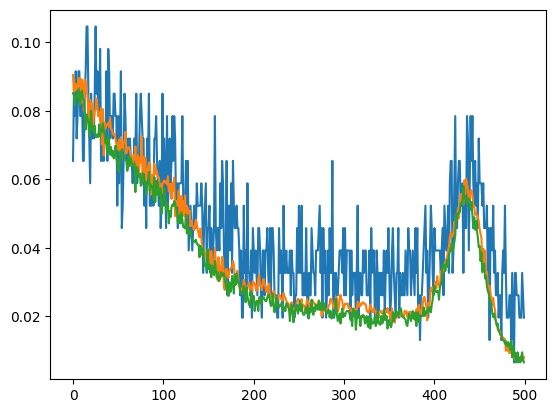

In [3]:
index = 50
print(network_MSE)
plt.plot(network_pred_input[index])
plt.plot(network_pred[index])
plt.plot(network_pred_GT[index])

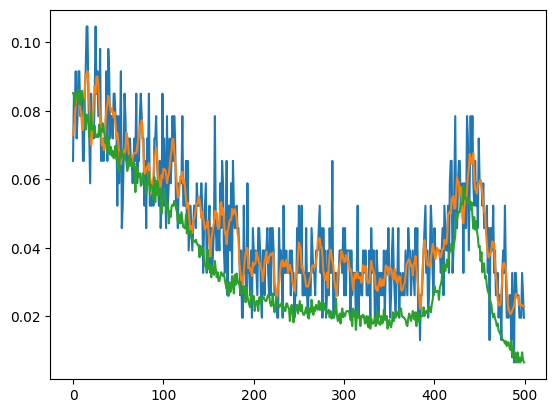

In [4]:


test_example = np.squeeze(noisy_va[0:100,:])
clean_va = clean_va[0:100,:]
y_smooth = signal.savgol_filter(test_example, window_length=11, polyorder=3, mode="nearest")

plt.plot(test_example[index])
plt.plot(y_smooth[index])
plt.plot(network_pred_GT[index])


In [5]:
SG_MSE = np.mean(np.mean((np.squeeze(y_smooth) - np.squeeze(clean_va))**2,axis=1))
print(SG_MSE)

0.0001766463342681826


In [6]:
#PCA denoising - https://scikit-learn.org/stable/auto_examples/applications/plot_digits_denoising.html

from sklearn.decomposition import PCA, KernelPCA

pca = PCA(n_components=32)
kernel_pca = KernelPCA(
    n_components=400, kernel="rbf", gamma=1e-3, fit_inverse_transform=True, alpha=5e-3
)

pca.fit(noisy_va)
_ = kernel_pca.fit(test_example)

X_reconstructed_kernel_pca = kernel_pca.inverse_transform(
    kernel_pca.transform(test_example)
)


In [7]:
X_reconstructed_pca = pca.inverse_transform(pca.transform(test_example))

In [8]:
PCA_MSE = np.mean(np.mean((np.squeeze(X_reconstructed_pca) - np.squeeze(clean_va))**2,axis=1))
print(PCA_MSE)

0.00016299094952692227


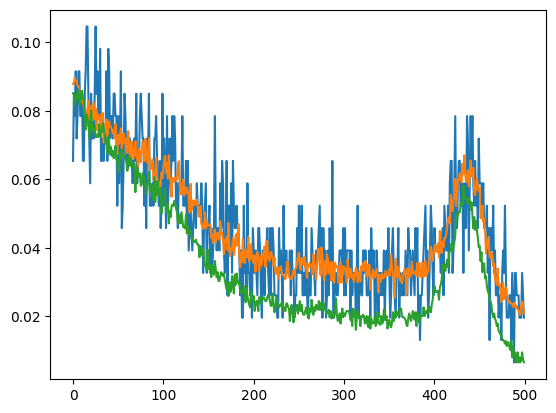

In [9]:
plt.plot(test_example[index])
plt.plot(np.squeeze(X_reconstructed_pca[index]))
plt.plot(network_pred_GT[index])

In [10]:
# Wavelet denoising

In [11]:
import numpy as np
#import PyWavelets as pywt
from skimage.restoration import denoise_wavelet
import matplotlib.pyplot as plt

x_denoise = denoise_wavelet(test_example, method='BayesShrink', mode='soft', wavelet_levels=3, wavelet='sym8', rescale_sigma='True')

/home/ciaran/.local/lib/python3.10/site-packages/pywt/_multilevel.py:43: UserWarning: Level value of 3 is too high: all coefficients will experience boundary effects.
  warnings.warn(


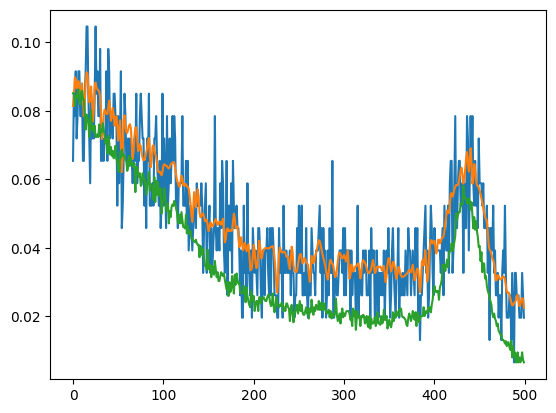

In [12]:
plt.plot(test_example[index])
plt.plot(np.squeeze(x_denoise[index]))
plt.plot(network_pred_GT[index])


In [13]:
wav_MSE = np.mean(np.mean((np.squeeze(x_denoise) - np.squeeze(clean_va))**2,axis=1))
print(wav_MSE)

0.00015311310680023995


In [14]:
# NOVA metric - https://www.pythonfordatascience.org/anova-python/#test_with_python

import scipy.stats as stats

stats.f_oneway(np.squeeze(x_denoise), test_example)

F_onewayResult(statistic=array([4.73316380e-01, 1.71236487e-01, 8.00286210e-01, 2.06239584e-01,
       7.20344914e-02, 2.05673415e-04, 2.05090410e+00, 7.62615673e-01,
       3.47923654e+00, 2.57519123e-02, 5.44764616e-02, 9.04178829e-03,
       4.73675999e+00, 9.98607314e-02, 3.68834454e-02, 8.53260376e-03,
       1.12159035e+00, 4.56973495e-01, 1.39586075e+00, 1.26725801e-02,
       5.31434326e-03, 1.03391984e-02, 2.00046091e-01, 5.26714854e-01,
       2.53691238e-01, 1.83142148e-02, 4.87350692e-02, 1.04651983e-02,
       1.46835502e-02, 1.42690182e+00, 7.93493673e-02, 7.71130567e-02,
       4.06574327e-02, 2.93096563e-03, 2.80296144e+00, 1.51118389e+00,
       1.19239420e+00, 3.94421695e-01, 1.74243093e+00, 1.45249679e+00,
       6.60455130e-02, 1.56266125e-01, 2.58204209e+00, 2.31073627e-02,
       3.08946187e-01, 1.85287803e-02, 1.23204894e-01, 7.24236915e-01,
       5.60863237e-02, 3.14668759e-01, 2.91953595e-01, 2.74258045e-01,
       4.33441709e-02, 5.76473230e-01, 1.15311532e-0